# Final Project NBA Players

Author: Rex Kim 

Course Project Preparation, UC Irvine, Math 10, W22

## Introduction

This project dives into advanced statistics of current NBA players in the 2021-2022 NBA season. Different statistical categories include win shares (WS), value over replacement player (VORP), and box plus/minus. I'm going to discover how the NBA ranks its top 10 current NBA players based on the categories just listed as well as other main stats such as points, rebounds, and assists. 

## Main portion of the project

(You can either have all one section or divide into multiple sections)

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss


df = pd.read_csv('nba_2020_adv.csv')
df



,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,2120,23.9,0.595,0.455,0.448,...,16.2,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1
647,Cody Zeller,C,27,CHO,58,1341,18.8,0.576,0.157,0.374,...,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5
648,Tyler Zeller,C,30,SAS,2,4,22.4,0.250,0.000,0.000,...,0.0,43.2,0.0,0.0,0.0,-0.075,-0.3,-22.1,-22.4,0.0
649,Ante Žižić,C,23,CLE,22,221,16.4,0.597,0.000,0.264,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


I will locate all players in the NBA and the position they play. 

In [ ]:
df.loc[:,["Player","Pos"]]

,Player,Pos
0,Steven Adams,C
1,Bam Adebayo,PF
2,LaMarcus Aldridge,C
3,Kyle Alexander,PF
4,Nickeil Alexander-Walker,SG
...,...,...
646,Trae Young,PG
647,Cody Zeller,C
648,Tyler Zeller,C
649,Ante Žižić,C


Because how much popularized the point guard position is, I decided to check all point guards and their statistics. 

In [ ]:
df.loc[df['Pos'] == 'PG']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
17,Ryan Arcidiacono,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.071,-2.7,-0.1,-2.8,-0.2
21,D.J. Augustin,PG,32,ORL,57,1420,14.0,0.554,0.436,0.393,...,13.7,19.1,2.0,0.9,2.9,0.098,-0.3,-1.3,-1.6,0.2
25,Lonzo Ball,PG,22,NOP,63,2025,13.1,0.517,0.575,0.111,...,21.1,18.5,0.4,2.0,2.4,0.058,0.1,0.6,0.6,1.3
27,J.J. Barea,PG,35,DAL,29,450,14.6,0.512,0.411,0.106,...,14.9,24.2,0.5,0.2,0.7,0.072,1.6,-3.0,-1.4,0.1
53,Patrick Beverley,PG,31,LAC,51,1342,12.5,0.560,0.604,0.138,...,15.4,13.3,1.6,2.0,3.6,0.128,-0.3,2.5,2.2,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Tremont Waters,PG,22,BOS,11,119,4.3,0.381,0.490,0.163,...,22.2,24.2,-0.5,0.2,-0.3,-0.103,-8.5,1.0,-7.5,-0.2
623,Russell Westbrook,PG,31,HOU,57,2049,21.0,0.536,0.166,0.297,...,15.0,34.4,1.7,2.5,4.2,0.098,1.6,-0.1,1.5,1.8
638,Nigel Williams-Goss,PG,25,UTA,10,50,8.1,0.415,0.438,0.125,...,15.1,17.4,-0.1,0.1,0.0,0.017,-5.2,1.3,-3.9,0.0
644,Justin Wright-Foreman,PG,22,UTA,4,45,8.8,0.437,0.500,0.200,...,12.1,24.1,-0.1,0.1,0.0,-0.008,-7.0,-2.0,-9.0,-0.1


In [ ]:
df.loc[df['Pos'] == 'PG']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
17,Ryan Arcidiacono,PG,25,CHI,58,930,9.0,0.551,0.627,0.173,...,13.5,12.5,0.7,0.7,1.4,0.071,-2.7,-0.1,-2.8,-0.2
21,D.J. Augustin,PG,32,ORL,57,1420,14.0,0.554,0.436,0.393,...,13.7,19.1,2.0,0.9,2.9,0.098,-0.3,-1.3,-1.6,0.2
25,Lonzo Ball,PG,22,NOP,63,2025,13.1,0.517,0.575,0.111,...,21.1,18.5,0.4,2.0,2.4,0.058,0.1,0.6,0.6,1.3
27,J.J. Barea,PG,35,DAL,29,450,14.6,0.512,0.411,0.106,...,14.9,24.2,0.5,0.2,0.7,0.072,1.6,-3.0,-1.4,0.1
53,Patrick Beverley,PG,31,LAC,51,1342,12.5,0.560,0.604,0.138,...,15.4,13.3,1.6,2.0,3.6,0.128,-0.3,2.5,2.2,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Tremont Waters,PG,22,BOS,11,119,4.3,0.381,0.490,0.163,...,22.2,24.2,-0.5,0.2,-0.3,-0.103,-8.5,1.0,-7.5,-0.2
623,Russell Westbrook,PG,31,HOU,57,2049,21.0,0.536,0.166,0.297,...,15.0,34.4,1.7,2.5,4.2,0.098,1.6,-0.1,1.5,1.8
638,Nigel Williams-Goss,PG,25,UTA,10,50,8.1,0.415,0.438,0.125,...,15.1,17.4,-0.1,0.1,0.0,0.017,-5.2,1.3,-3.9,0.0
644,Justin Wright-Foreman,PG,22,UTA,4,45,8.8,0.437,0.500,0.200,...,12.1,24.1,-0.1,0.1,0.0,-0.008,-7.0,-2.0,-9.0,-0.1


The following assigns a standard scaler to scaler and also initializes our training and testing data. 

In [ ]:

scaler = StandardScaler()
df[["BPM","USG%"]] = scaler.fit_transform(df[["BPM","USG%"]])

X_train, X_test, y_train, y_test = train_test_split(df[["BPM","USG%"]], df["Age"], test_size=0.2)

In [ ]:
X = df[['USG%', 'BPM']]
X

,USG%,BPM
0,-0.179574,1.124504
1,0.512894,1.244773
2,0.903518,0.763698
3,-1.440223,-1.882216
4,0.885762,-0.679528
...,...,...
646,2.945413,1.365042
647,0.441872,0.282622
648,4.419128,-4.961097
649,-0.144063,-0.342775


Below, I'm ensuring that the dataframe X which holds usage rate and box plus/minus are resized for distribution.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
y = df['Age']
y

0      26
1      22
2      34
3      23
4      21
       ..
646    21
647    27
648    30
649    23
650    22
Name: Age, Length: 651, dtype: int64

In [ ]:
y_test

69     27
243    26
281    23
245    33
388    33
       ..
228    21
450    28
638    25
221    28
327    32
Name: Age, Length: 131, dtype: int64

The K-neighbors classifier is assigned to clf and this is where we create an Altair scatter plot with box plus/minus being on the x-axis and usage rate being on the y axis. I am also configuring the orientiation of the legend. 

The Altair chart below shows when nearest neighbors has a k value of 1 meaning that the bias is 0. If k = 1, then the object is simply assigned to the class of that single nearest neighbor. By hovering over the rightmost players, we can see that the more notable players like James Harden and Lebron James lead the lead in box plus/minus but there are also players who played minimal minutes but had productive games.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
df["pred"] = clf.predict(df[["BPM","USG%"]])
c = alt.Chart(df).mark_circle().encode(
    x="BPM",
    y="USG%",
    color=alt.Color("pred", title="Age"),
    tooltip = ('Player:N','Age:Q','BPM:Q','USG%:Q','MP:Q')
).properties(
    title="Box Plus/Minus vs. Usage",
    width=1000,
    height=400,
)

c.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-right'
)
alt.data_transformers.disable_max_rows()
print(f"The number of rows in this dataset is {df.shape[0]}")
c

The number of rows in this dataset is 651


alt.Chart(...)

Below I am checking to see whether there is overfitting or underfitting. 

In [ ]:
clf.score(X_train,y_train)

0.9903846153846154

In [ ]:
clf.score(X_test,y_test)

0.08396946564885496

The data looks to be underfitting since the training set is lower than the testing set.

Here, I am creating another ten Altair scatter plots but when k neighbors increments from 1 to 9. Larger values of k will have smoother decision boundaries which mean lower variance but increased bias. In turn, this can significantly influence our result. 

In [ ]:

def make_chart(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    df[f"pred{k}"] = clf.predict(df[["BPM","USG%"]])
    test_score = clf.score(X_test,y_test) 
    train_score = clf.score(X_train,y_train)
    c = alt.Chart(df).mark_circle().encode(
        x="BPM",
        y="USG%",
        color=alt.Color(f"pred{k}", title="Predicted Age"),
        tooltip = ('Player:N','Age:Q','BPM:Q','USG%:Q','MP:Q')
    ).properties(
        title=f"n_neighbors = {k}",
        width=1000,
        height=200,
    )
    c.configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-right'
)
    
    return c 


In [ ]:
alt.vconcat(*[make_chart(k) for k in range(1,10)])


alt.VConcatChart(...)

Below I will now attempt to create a boxplot for all players' age, box plus/minus, and usage rate. I will include how to read a boxplot

Minimum: Smallest number in the dataset.
First quartile: Middle number between the minimum and the median.
Second quartile (Median): Middle number of the (sorted) dataset.
Third quartile: Middle number between median and maximum.
Maximum: Highest number in the dataset.

The boxplot below shows that the average age of NBA players is roughly 25 years. With outliers like Jamal Crawford being age 43.

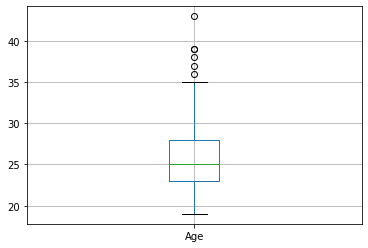

In [ ]:
ageBoxPlot = df.boxplot(column=['Age'])  

The boxplot below measures all NBA players box plus/minus. The lower the box plus/minus the lesser the player actually performs in game and contributes to winning. This isn't exactly the best representation of NBA players as Jamal Crawford only played 6 total minutes this recorded season. 

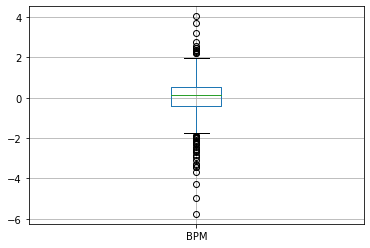

In [ ]:
bpmBoxPlot = df.boxplot(column=['BPM'])  

As k gets larger, there is lower variance and greater bias. This is how players like Tyler Zeller have such high usage rates despite playing such little minutes. 

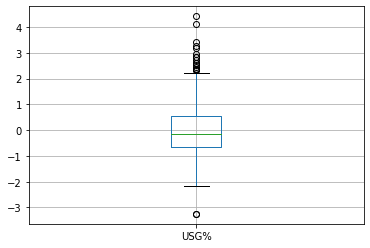

In [ ]:
usgBoxPlot = df.boxplot(column=["USG%"]) 

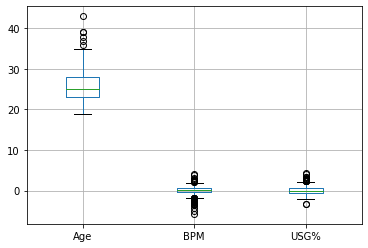

In [ ]:
boxplot = df.boxplot(column=["Age","BPM","USG%"]) 

I found that specifying age, BPM, and USG% by position and top 10 players in the NBA was somewhat difficult. The plots and altair charts above represent the idea that there are only a select few players whose advanced statistics still remain high despite aging. Players like Stephen Curry, Kevin Durant, and Lebron James are namely a few. 

## Summary
In the NBA, win shares are calculated using main stats. In this project, I tried to determine if a player's age of could be predicted by a player's usage rate(USG%) and box plus/minus. The models above show that with increased age, majority of players' USG% and BPM decrease significantly. 

## References

Include references that you found helpful.  Also say where you found the dataset you used.

Information on pie charts and box plots
https://deepnote.com/@a11s/Data-Visualisation-with-Python-EgfTyjpfS129FYXEnB2U7Q 


URL to dataset
https://www.kaggle.com/nicklauskim/nba-per-game-stats-201920 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abeeb5a2-9a64-4252-a853-c7a1924df0f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>